In [1]:
%matplotlib inline
import Quandl
import pandas
import matplotlib.pyplot as plt

In [2]:
countries = ["WWDI/CHL_NY_GNP_PCAP_CD", "WWDI/URY_NY_GNP_PCAP_CD", "WWDI/HUN_NY_GNP_PCAP_CD"]
mydataframe = Quandl.get(countries)


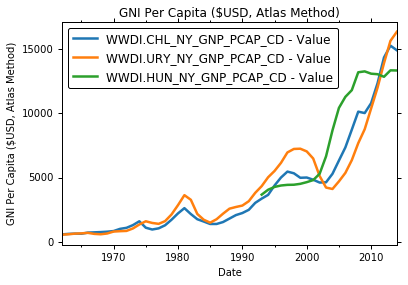

In [4]:
mydataframe.plot();
plt.legend(loc='best');
plt.title("GNI Per Capita ($USD, Atlas Method)");
plt.xlabel('Date'); 
plt.ylabel('GNI Per Capita ($USD, Atlas Method)');


In [2]:
file = open('country_codes.txt').read()
a= file.split('\n')

In [3]:
country = {}
for c in range(2, len(a)-2):
    c, co = a[c].split('|')
    country[c] = co

In [4]:
file2 =open('wwdi_indicators.txt').read()
b = file2.split('\n')

In [5]:
indicators = {}
for c in range(2, len(b)-2):
    ind, co = b[c].split('|')
    indicators[ind] = co

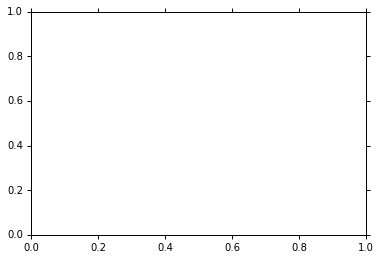

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)
def plot_c(countr, indic1,indic2):
    co = country[countr]
    ind = indicators[indic1]
    ind2 = indicators[indic2]
    need = ["WWDI/" + str(co) +"_"+ str(ind),"WWDI/" + str(co) +"_"+ str(ind2)]
    first= Quandl.get(need)
    time = first.index
    indic_first = first.as_matrix()[:,0]
    indic_second = first.as_matrix()[:,1]
    
    ax.plot(time, indic_first, '-', label = indic1)
    #ax.plot(time, Rn, '-', label = 'Rn')
    ax2 = ax.twinx()
    ax2.plot(time, indic_second, '-r', label = indic2)
    ax.legend(loc=0)
    
    ax.grid()
    ax.set_xlabel("Dates (Years)")
    ax.set_ylabel(indic1)
    ax2.set_ylabel(indic2)
    ax2.legend(loc=0)
   
    plt.show()
    
    
 

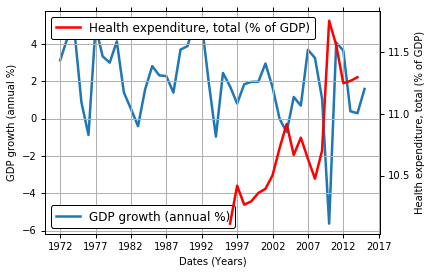

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.figure(figsize=(50,40))
plot_c('Germany', 'GDP growth (annual %)','Health expenditure, total (% of GDP)')
#plot_c('Germany', 'Health expenditure, total (% of GDP)')



In [75]:
k.index

DatetimeIndex(['1971-12-31', '1972-12-31', '1973-12-31', '1974-12-31',
               '1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31',
               '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31',
               '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31',
               '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31',
               '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
               '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

In [31]:
rel_ind = ["Expenditure per student, tertiary (% of GDP per capita)","Gross national expenditure (% of GDP)",
          "Health expenditure per capita (current US$)","Health expenditure, public (% of GDP)", "Military expenditure (% of GDP)",
          "Research and development expenditure (% of GDP)","Mortality rate, adult, female (per 1,000 female adults)"]
    
'''    
    
    "Access to electricity (% of population)","Maternal mortality ratio (national estimate, per 100,000 live births)","Urban population growth (annual %)","Mobile cellular subscriptions (per 100 people)", 
          "Literacy rate, adult total (% of people ages 15 and above)"]

, "Labor participation rate, total (% of total population ages 15+)", "Labor force with primary education (% of total)", "Labor force with secondary education (% of total)", "Secondary education, pupils", "Primary education, pupils", "Literacy rate, adult total (% of people ages 15 and above)", "Literacy rate, youth female (% of females ages 15-24)", "Literacy rate, youth total (% of people ages 15-24)", 
          "Telephone lines (per 100 people)", "Access to electricity (% of population)", "Roads, paved (% of total roads)", "Roads, total network (km)", "Vehicles (per km of road)", "Mobile cellular subscriptions (per 100 people)", "Improved sanitation facilities (% of population with access)", "Improved sanitation facilities, rural (% of rural population with access)",
          "Maternal mortality ratio (national estimate, per 100,000 live births)" ]
          "Arable land (% of land area)", "Urban population (% of total)", "Urban population growth (annual %)", "Rural population (% of total population)", "Rural population growth (annual %)", "Tax revenue (% of GDP)",
         "Patent applications, residents","Labor force, female (% of total labor force)"

'''        
'''

returns numpy array of X and Y data values

params:
    country - name of Country of interest
    targets - code of target(Y) indicators


'''

def get_data_arr(countr, targets):
    
    indics = []
    targs = []
    k = 0
    for ind in rel_ind:
        indics.append("WWDI/" + str(country[countr]) + "_"+ str(indicators[ind]))
            
    for targ in targets:
        targs.append("WWDI/" + str(country[countr]) + "_"+ str(indicators[targ]))
    
    x = Quandl.get(indics, authtoken = "eZi-HRUBuesv9PTuzE16")
    y = Quandl.get(targs, authtoken = "eZi-HRUBuesv9PTuzE16") 
    return x,y
        
        
        
        

In [92]:
rel_ind[23]

'Improved sanitation facilities, rural (% of rural population with access)'

In [39]:
x,y = get_data_arr("Kenya", ["GDP growth (annual %)"] )


In [41]:
x.shape

(55, 7)

In [42]:
from scipy import stats
import numpy as np

#xxx = x[12:]
xxx = x
xxx = xxx[:-1]
xxx = xxx.dropna(axis=0, how = 'all')

xxx
xxe  = xxx.fillna(method= 'bfill')
xxe = xxe.fillna(method = 'pad')
xxe = xxe.fillna(0)
xxe = xxe.loc[:, (xxe != 0).any(axis=0)]

cols = xxe.columns
X = xxe.as_matrix()
Y = y.as_matrix()


X = (stats.zscore(X, axis=0))
X = sm.add_constant(X).astype(float)
Y = stats.zscore(Y).astype(float)


In [43]:
import statsmodels.api as sm




In [44]:
model = sm.OLS(Y,X)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.6823
Date:                Sun, 13 Mar 2016   Prob (F-statistic):              0.686
Time:                        17:44:31   Log-Likelihood:                -73.955
No. Observations:                  54   AIC:                             163.9
Df Residuals:                      46   BIC:                             179.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.717e-16      0.140  -1.22e-15      1.0

In [49]:
rel_ind[4]

'Military expenditure (% of GDP)'

In [115]:
import numpy as np
aa=np.matrix([[1, 2, 3,4], [4, 4, 6,7], [1, 8, 9,10]])

In [118]:
hh = stats.zscore(aa, axis=0)
hy = np.matrix([[5],[10],[15]])


matrix([[-0.70710678],
        [ 1.41421356],
        [-0.70710678]])

In [117]:
model = sm.OLS(hy,hh)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                 -1.571
Method:                 Least Squares   F-statistic:                   0.08333
Date:                Sun, 13 Mar 2016   Prob (F-statistic):              0.926
Time:                        16:30:02   Log-Likelihood:                -11.165
No. Observations:                   3   AIC:                             26.33
Df Residuals:                       1   BIC:                             24.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2496      9.784      0.026      0.9

In [120]:
d = {'col2': [6, 60, 60, 6, 60], 'col3': [1, 0, 0, 0, 1], 'col4': [1, 2, 1, 1, 1]}
df = pandas.DataFrame(data=d)

In [125]:
df=df.as_matrix()

In [144]:
import pandas as pd
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [145]:
print_full(xxe)

            WWDI.DEU_AG_LND_ARBL_ZS - Value  \
Date                                          
1972-12-31                        34.382608   
1973-12-31                        34.342509   
1974-12-31                        34.428436   
1975-12-31                        34.488586   
1976-12-31                        34.620342   
1977-12-31                        34.574514   
1978-12-31                        34.617478   
1979-12-31                        34.534414   
1980-12-31                        34.457079   
1981-12-31                        34.382608   
1982-12-31                        34.299545   
1983-12-31                        34.276630   
1984-12-31                        34.233667   
1985-12-31                        34.247988   
1986-12-31                        34.256581   
1987-12-31                        34.213617   
1988-12-31                        34.222209   
1989-12-31                        34.225074   
1990-12-31                        34.288088   
1991-12-31   